# 0. Preparation

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

Import UCI Adult database through ucimlrepo module.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

raw_df=pandas.DataFrame(adult.data.original)

label_column="income"

# 1. Database analysis

In [3]:
# print variable information 
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [4]:
print(f"The dataset contains {raw_df.shape[0]} entries")
print(f"Number of duplicate entries: {raw_df.duplicated().sum()}")

df=raw_df.drop_duplicates()

print(f"The dataset contains {df.shape[0]} unique entries")

The dataset contains 48842 entries
Number of duplicate entries: 29
The dataset contains 48813 unique entries


In [54]:
df=df.copy()
df[label_column]=df[label_column].replace(['<=50K.','>50K.'],['<=50K','>50K'])
#cleaning faulty label in the dataset
df=df.replace(['?'],[np.nan])
#Unifiying missing values

Unifying values with the same meaning in the dataset

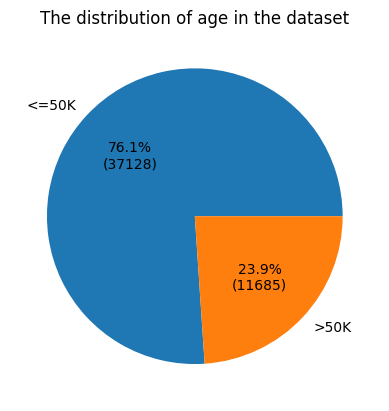

In [6]:
label_count = df[label_column].value_counts()

def autolabel(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
plt.title("The distribution of age in the dataset")
plt.show()

The label is imbalanced, with negative dominating the dataset.

# 2. Protected Variable Analysis

In [7]:
sex_column="sex"
race_column="race"
age_column="age"
print("The protected variables in the dataset could be 'age', 'race', 'sex' (Quy et al., 2022).")

The protected variables in the dataset could be 'age', 'race', 'sex' (Quy et al., 2022).


## 2.1 The analysis of protected variable age

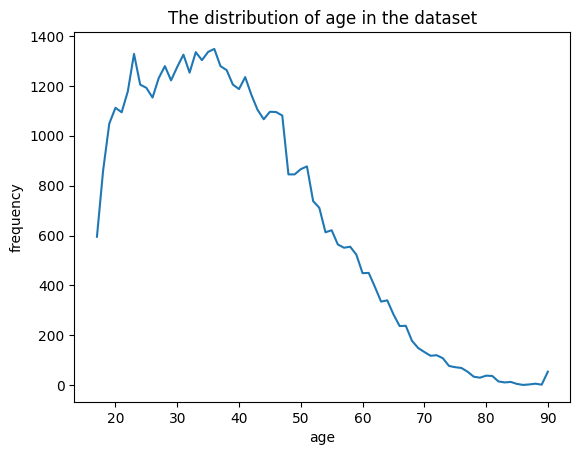

In [71]:
age_count = df[age_column].value_counts()
age_count=age_count.sort_index()
plt.plot(age_count)
plt.title("The distribution of age in the dataset")
plt.xlabel ('age')
plt.ylabel ('frequency')
plt.show()

The youngest entry in the dataset has age 17

The oldest entry in the dataset has age 90

In order to further analyze the distribution, we discretize them into several groups.

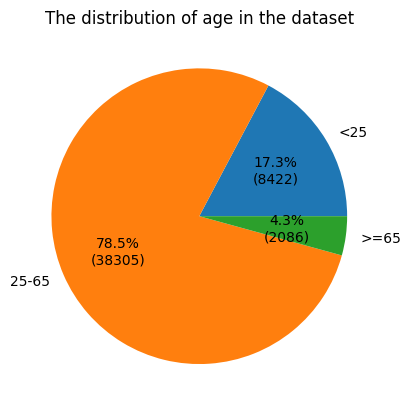

In [9]:
discreted_bin=["<25","25-65",">=65"]
discreted_count=[0,0,0]

for index,row in age_count.items():
    if index<25:
        discreted_count[0]+=row
    elif index<65:
        discreted_count[1]+=row
    else:
        discreted_count[2]+=row

plt.pie(discreted_count,labels=discreted_bin, autopct=lambda pct: autolabel(pct, discreted_count))
plt.title("The distribution of age in the dataset")
plt.show()

Regarding this protected varaible, the dataset is dominated by age group (25-65) (78.5% agianst 21.5%).

Hence, the privillegded value can be considered to be being in the age group of 25-65.

Ages outside the age groupd can be considered to be the unprevillegded value.

## 2.2 The analysis of protected variable sex

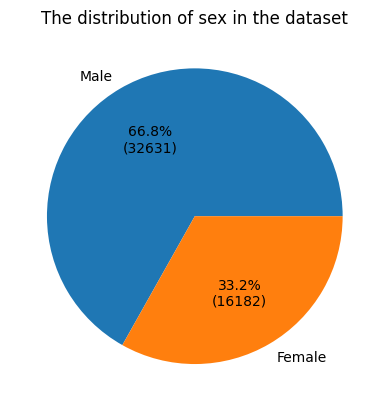

In [10]:
sex_count = df[sex_column].value_counts()

plt.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
plt.title("The distribution of sex in the dataset")
plt.show()

Regarding this protected varaible, the dataset is dominated by Male (66.8% agianst 33.2%).

Hence, the privillegded value can be considered to be Male.

Female on the other hand can be considered to be the unprevillegded value.

## 2.3 The analysis of protected variable race

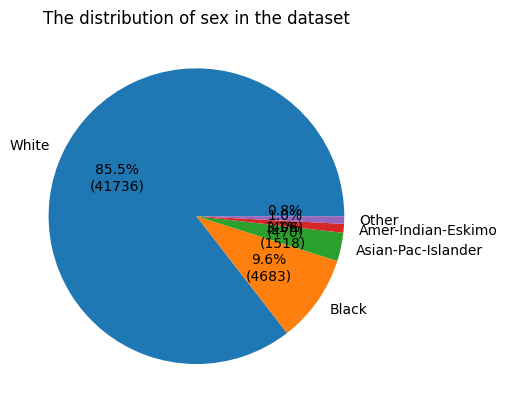

In [11]:
race_count = df[race_column].value_counts()

plt.pie(race_count,labels=race_count.index, autopct=lambda pct: autolabel(pct, race_count))
plt.title("The distribution of sex in the dataset")
plt.show()

Regarding this protected varaible, the dataset is dominated by White (85.5% agianst 14.5%).

Hence, the privillegded value can be considered to be White.

Races other than white can be considered to be the unprevillegded value.

# 3. The other variable analysis

## 3.1 Workclass

There are 2799 missing values in the workclass feature


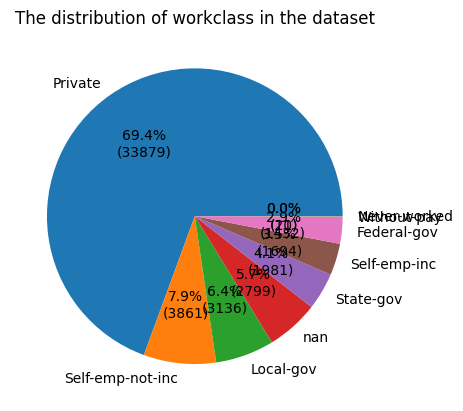

In [22]:
workclass_count=df["workclass"].value_counts(dropna=False)
print(f"There are {workclass_count[np.nan]} missing values in the workclass feature")
plt.pie(workclass_count,labels=workclass_count.index, autopct=lambda pct: autolabel(pct, workclass_count))
plt.title("The distribution of workclass in the dataset")
plt.show()

## 3.2 fnlwgt

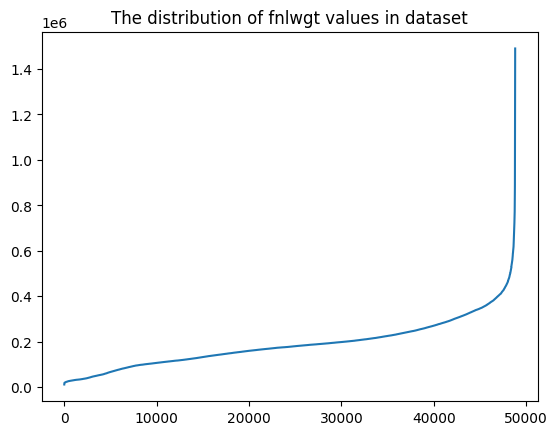

In [48]:
fnlwgt_column=df["fnlwgt"].copy()
fnlwgt_column=fnlwgt_column.sort_values()
plt.plot(fnlwgt_column.values)
plt.title("The distribution of fnlwgt values in dataset")
plt.show()

## 3.3 Education & Education Number

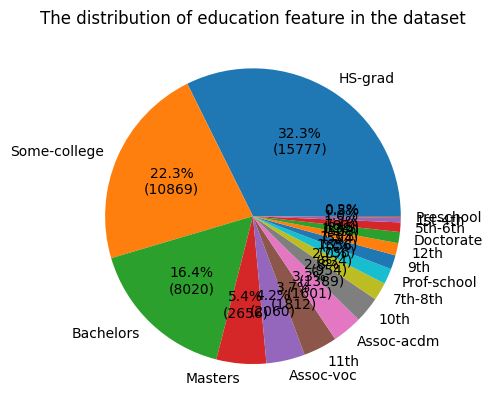

In [30]:
Education_count=df["education"].value_counts(dropna=False)
plt.pie(Education_count,labels=Education_count.index, autopct=lambda pct: autolabel(pct, Education_count))
plt.title("The distribution of education feature in the dataset")
plt.show()

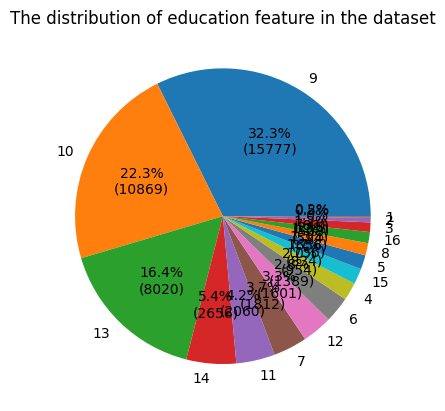

In [33]:
Education_num_count=df["education-num"].value_counts(dropna=False)
plt.pie(Education_num_count,labels=Education_num_count.index, autopct=lambda pct: autolabel(pct, Education_num_count))
plt.title("The distribution of education feature in the dataset")
plt.show()

It confirm that Education feature and Education_num feature are identical, where education_level is the integer representation of education feature.

## 3.4 Marital Status

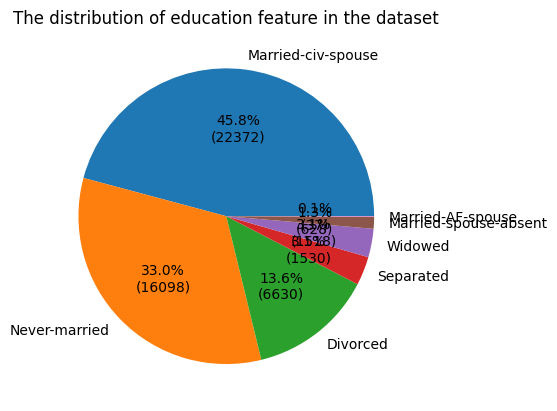

In [35]:
marital_count=df["marital-status"].value_counts(dropna=False)
plt.pie(marital_count,labels=marital_count.index, autopct=lambda pct: autolabel(pct, marital_count))
plt.title("The distribution of marital status feature in the dataset")
plt.show()

## 3.5 Occupation

There are 2809 missing values in the occupation feature


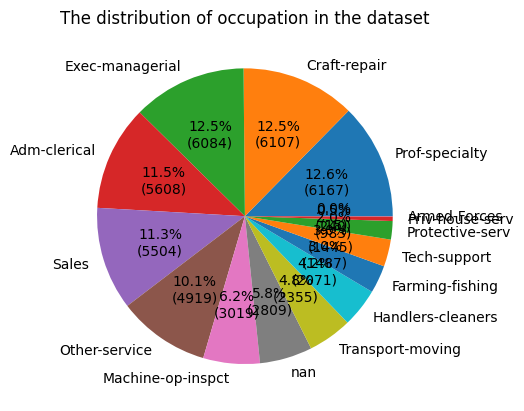

In [77]:
occupation_count=df["occupation"].value_counts(dropna=False)
print(f"There are {occupation_count[np.nan]} missing values in the occupation feature")
plt.pie(occupation_count,labels=occupation_count.index, autopct=lambda pct: autolabel(pct, occupation_count))
plt.title("The distribution of occupation in the dataset")
plt.show()

## 3.6 Relationship

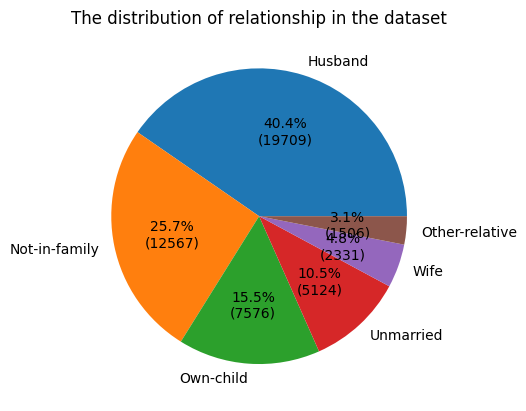

In [40]:
relationship_count=df["relationship"].value_counts(dropna=False)
plt.pie(relationship_count,labels=relationship_count.index, autopct=lambda pct: autolabel(pct, relationship_count))
plt.title("The distribution of relationship in the dataset")
plt.show()

## 3.7 Capital-gain and Capital-Loss

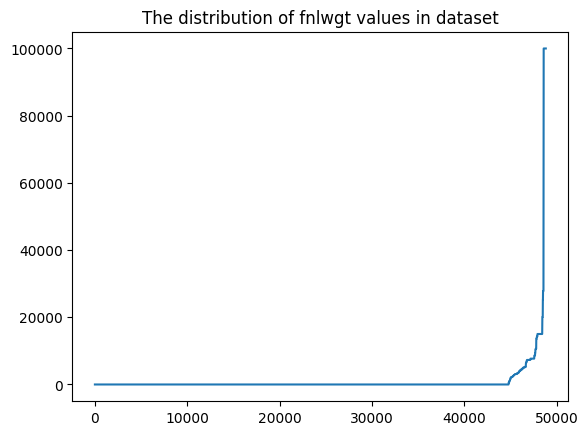

In [49]:
capital_gain_column= df["capital-gain"].copy()
capital_gain_column=capital_gain_column.sort_values()
plt.plot(capital_gain_column.values)
plt.title("The distribution of capital gain values in dataset")
plt.show()

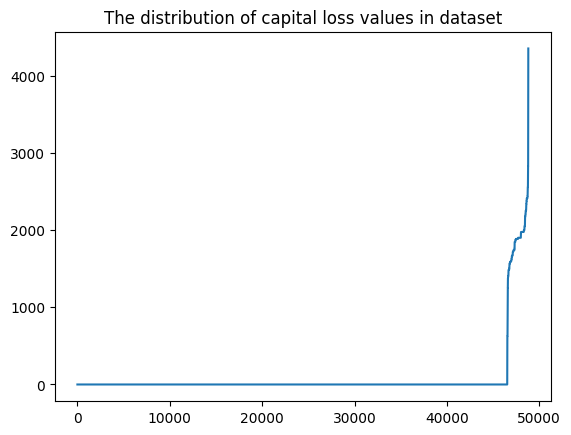

In [50]:
capital_loss_column= df["capital-loss"].copy()
capital_loss_column=capital_loss_column.sort_values()
plt.plot(capital_loss_column.values)
plt.title("The distribution of capital loss values in dataset")
plt.show()

## 3.8 Hours-per-work

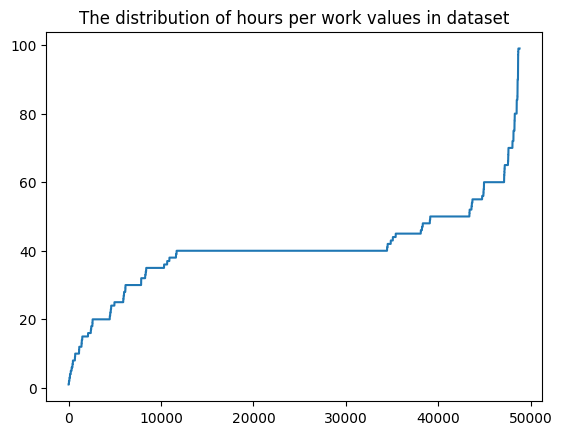

In [52]:
HPW_column= df["hours-per-week"].copy()
HPW_column=HPW_column.sort_values()
plt.plot(HPW_column.values)
plt.title("The distribution of hours per work values in dataset")
plt.show()

## 3.9 Native Country

There are 856 missing values in the native country feature


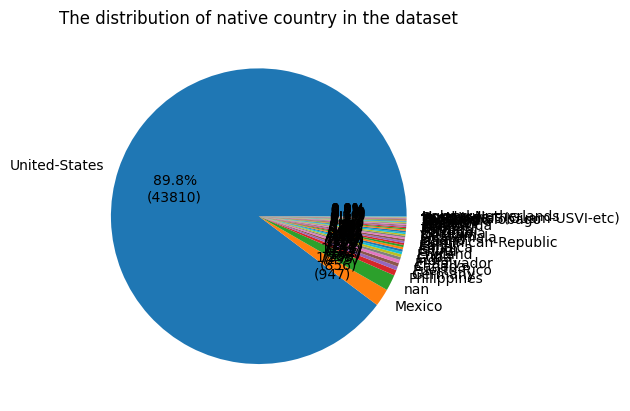

In [78]:
native_count=df["native-country"].value_counts(dropna=False)
print(f"There are {native_count[np.nan]} missing values in the native country feature")
plt.pie(native_count,labels=native_count.index, autopct=lambda pct: autolabel(pct, native_count))
plt.title("The distribution of native country in the dataset")
plt.show()

# 4. Missing Value Entries Analysis

In [62]:
NullFrame= df[df.isnull().values.any(axis=1)]

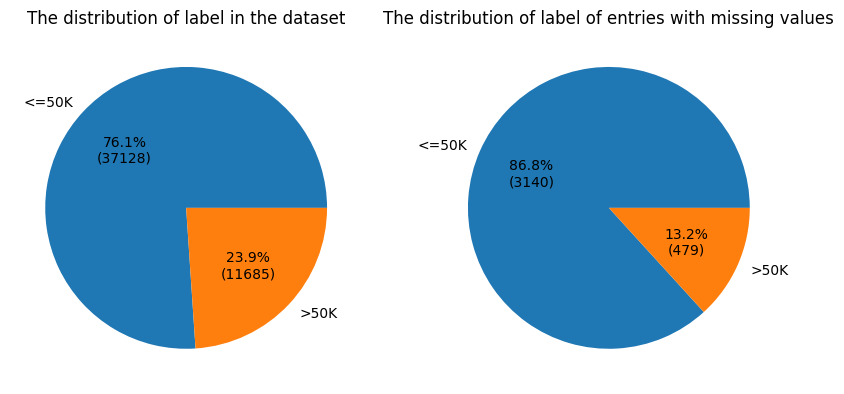

In [68]:
Null_label_count = NullFrame[label_column].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
ax2.pie(Null_label_count,labels=Null_label_count.index, autopct=lambda pct: autolabel(pct, Null_label_count))
ax1.set_title("The distribution of label in the dataset")
ax2.set_title("The distribution of label of entries with missing values")
plt.show()
plt.close(fig)

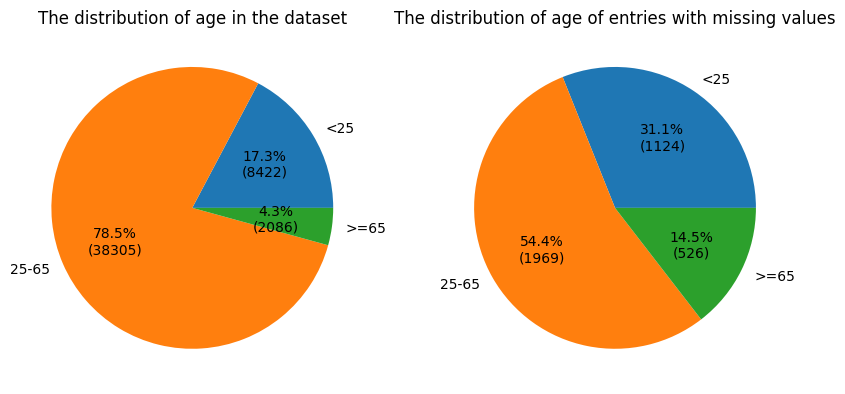

In [73]:
Null_age_count = NullFrame[age_column].value_counts()
Null_age_count=Null_age_count.sort_index()
Null_discreted_count=[0,0,0]
for index,row in Null_age_count.items():
    if index<25:
        Null_discreted_count[0]+=row
    elif index<65:
        Null_discreted_count[1]+=row
    else:
        Null_discreted_count[2]+=row
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.pie(discreted_count,labels=discreted_bin, autopct=lambda pct: autolabel(pct, discreted_count))
ax2.pie(Null_discreted_count,labels=discreted_bin, autopct=lambda pct: autolabel(pct, Null_discreted_count))
ax1.set_title("The distribution of age in the dataset")
ax2.set_title("The distribution of age of entries with missing values")
plt.show()
plt.close(fig)

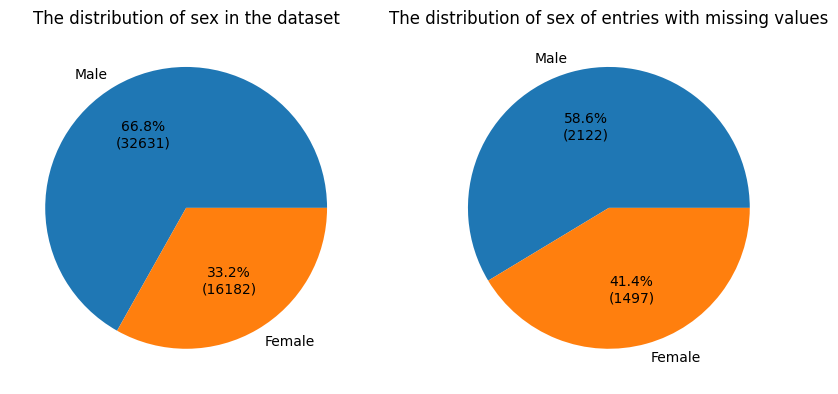

In [74]:
Null_sex_count = NullFrame[sex_column].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
ax2.pie(Null_sex_count,labels=Null_sex_count.index, autopct=lambda pct: autolabel(pct, Null_sex_count))
ax1.set_title("The distribution of sex in the dataset")
ax2.set_title("The distribution of sex of entries with missing values")
plt.show()
plt.close(fig)

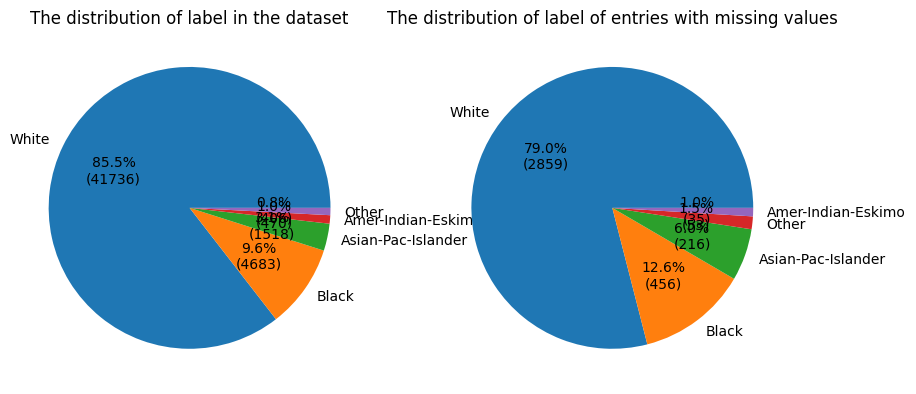

In [75]:
Null_race_count = NullFrame[race_column].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.pie(race_count,labels=race_count.index, autopct=lambda pct: autolabel(pct, race_count))
ax2.pie(Null_race_count,labels=Null_race_count.index, autopct=lambda pct: autolabel(pct, Null_race_count))
ax1.set_title("The distribution of label in the dataset")
ax2.set_title("The distribution of label of entries with missing values")
plt.show()
plt.close(fig)